In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
dataset = pd.read_csv('UberDataset.csv')
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [3]:
df = dataset.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


We donot know tha purpose null values so we fill them with not

In [5]:
df['PURPOSE'].fillna("NOT", inplace=True)

In [6]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [7]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

Splitting the START_DATE to date and time column and then converting the time into four different categories i.e. Morning, Afternoon, Evening, Night

In [8]:
from datetime import datetime

df['date'] = pd.DatetimeIndex(df['START_DATE']).date
df['time'] = pd.DatetimeIndex(df['START_DATE']).hour

#changing into categories of day and night
df['day-night'] = pd.cut(x=df['time'],
                            bins = [0,10,15,19,24],
                            labels = ['Morning','Afternoon','Evening','Night'])


In [9]:
df.dropna(inplace=True)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
    unique_values[col] = df[col].unique().size
unique_values

{'CATEGORY': 2, 'START': 175, 'STOP': 186, 'PURPOSE': 11, 'date': 291}

<Axes: xlabel='CATEGORY', ylabel='count'>

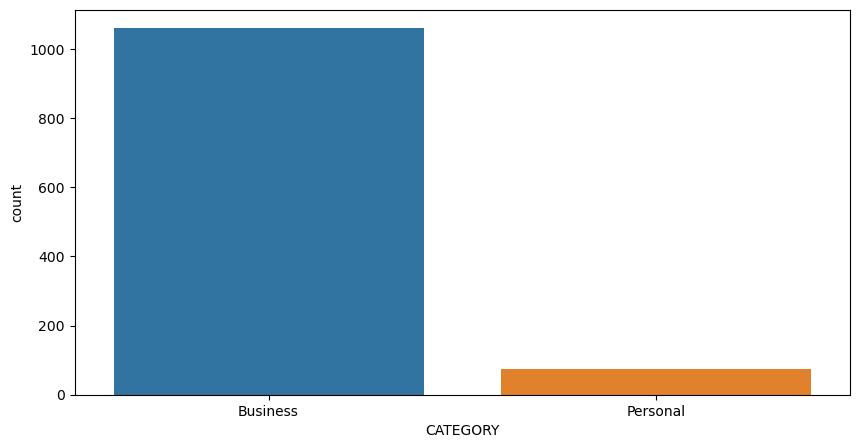

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x="CATEGORY", data=df)

<Axes: xlabel='PURPOSE', ylabel='count'>

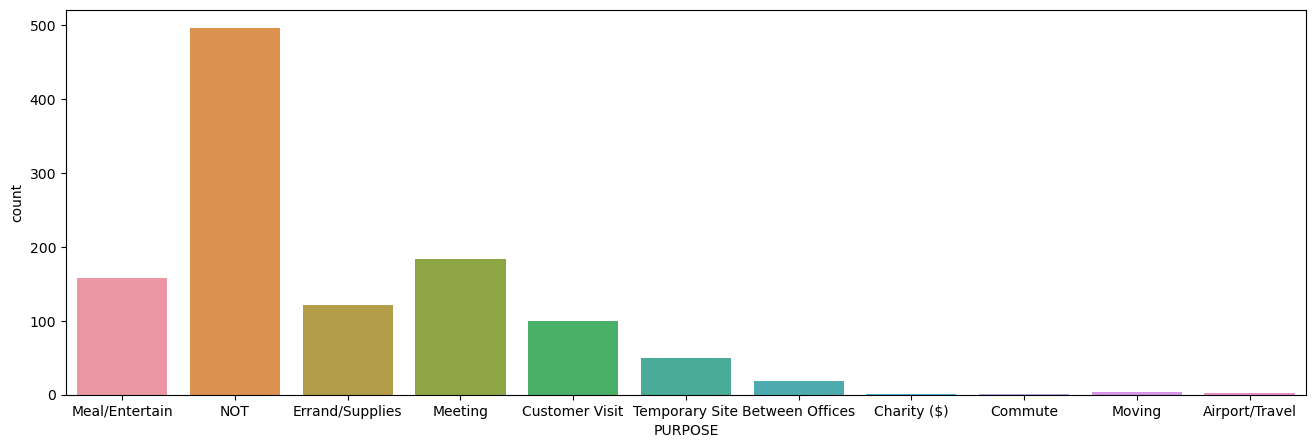

In [13]:
plt.figure(figsize=(16,5))
sns.countplot(x='PURPOSE', data=df)

<Axes: xlabel='day-night', ylabel='count'>

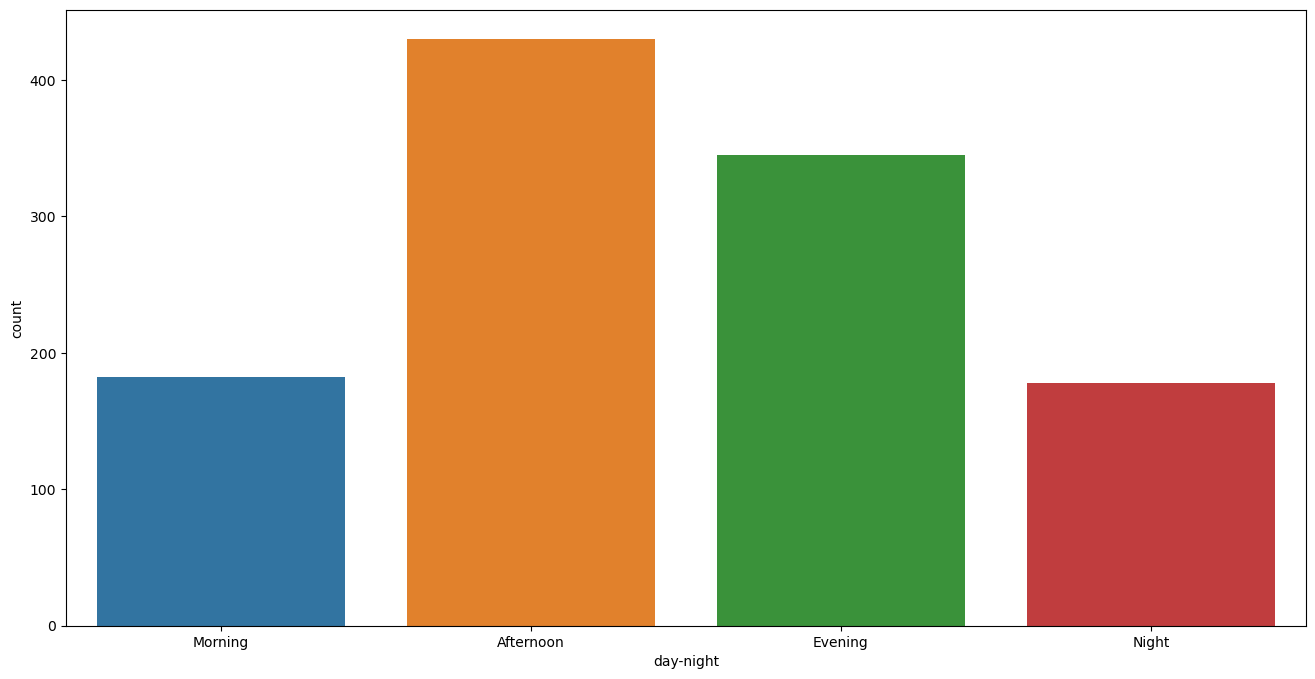

In [14]:
plt.figure(figsize=(16,8))
sns.countplot(x='day-night', data=df)

<Axes: xlabel='PURPOSE', ylabel='count'>

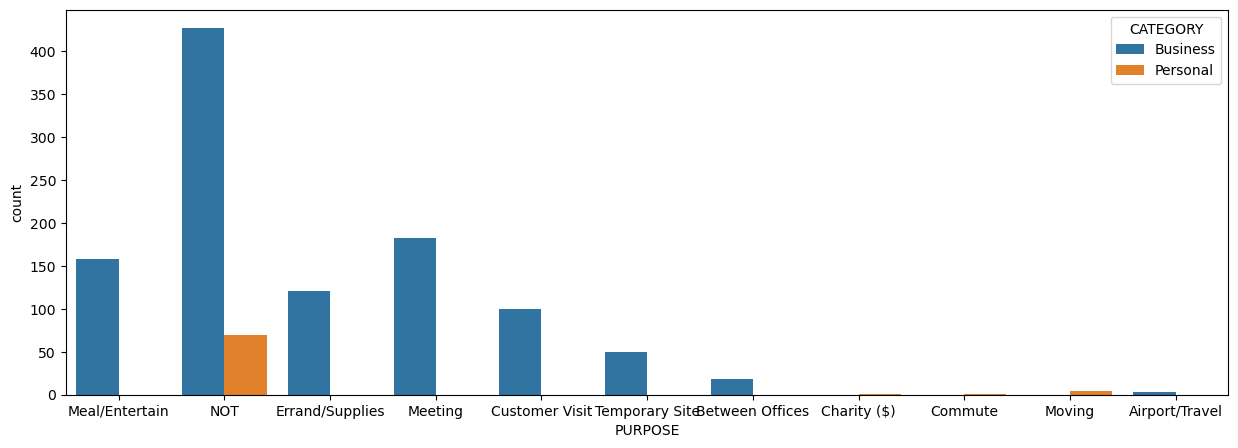

In [15]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='PURPOSE', hue='CATEGORY')

# Insights from the above count-plots : 
1. Most of the rides are booked for business purpose.
2. Most of the people book cabs for Meetings and Meal / Entertain purpose.
3. Most of the cabs are booked in the time duration of 10am-5pm (Afternoon).

In [17]:
from sklearn.preprocessing import OneHotEncoder
object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = dataset.drop(object_cols, axis=1)
dataset = pd.concat([df_final, OH_cols], axis=1)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [20]:
OH_cols

,CATEGORY_Business,CATEGORY_Personal,CATEGORY_nan,PURPOSE_Airport/Travel,PURPOSE_Between Offices,PURPOSE_Charity ($),PURPOSE_Commute,PURPOSE_Customer Visit,PURPOSE_Errand/Supplies,PURPOSE_Meal/Entertain,PURPOSE_Meeting,PURPOSE_Moving,PURPOSE_Temporary Site,PURPOSE_nan
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1152,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1153,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1154,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


C:\Users\Dell\AppData\Local\Temp\ipykernel_10468\422571781.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),


<Axes: >

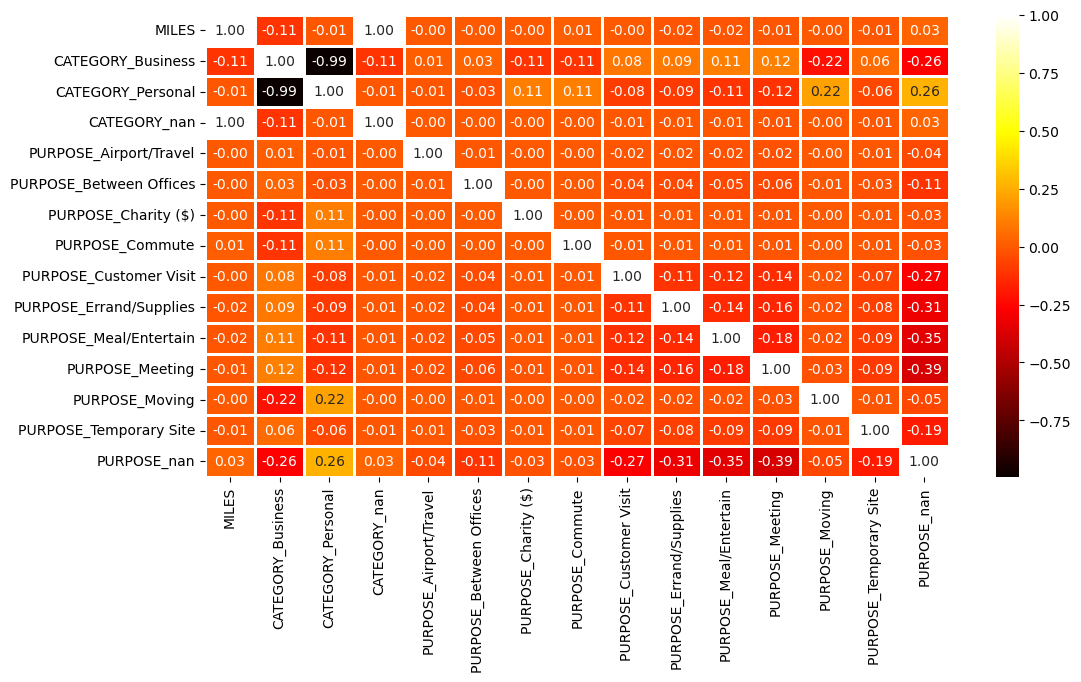

In [19]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(), 
            cmap='hot', 
            fmt='.2f', 
            linewidths=2, 
            annot=True)


# Insights from the heatmap:
1. Business and Personal Category are highly negatively correlated, this have already proven earlier. So this plot, justifies the above conclusions.
2. There is not much correlation between the features.

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

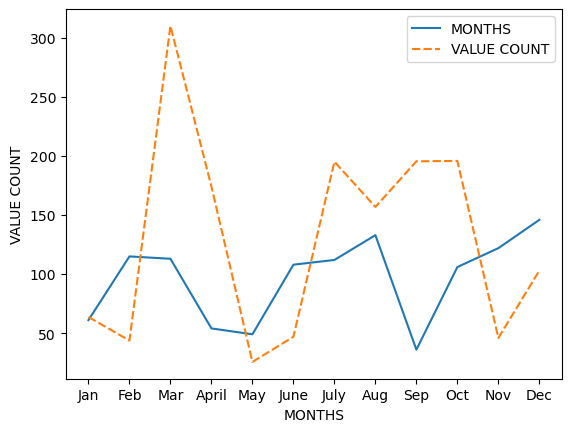

In [22]:
# Drop rows where 'START_DATE' cannot be converted to datetime
dataset = dataset[pd.to_datetime(dataset['START_DATE'], errors='coerce').notnull()]
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
            5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
            9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)

mon = dataset.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
df2 = pd.DataFrame({"MONTHS": mon.values,
                "VALUE COUNT": dataset.groupby('MONTH', sort=False)['MILES'].max()})

p = sns.lineplot(data=df2)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

# Insights from the above plot : 
1. The counts are very irregular.
2. Still its very clear that the counts are very less during Nov, Dec, Jan, which justifies the fact that  time winters are there in Florida, US.

In [24]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
dataset['DAY'] = dataset['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

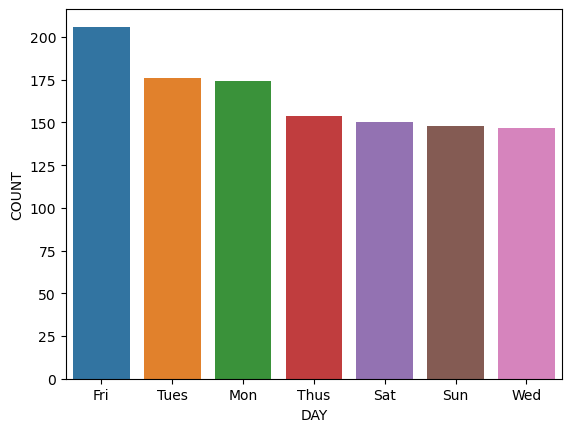

In [25]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')

<Axes: >

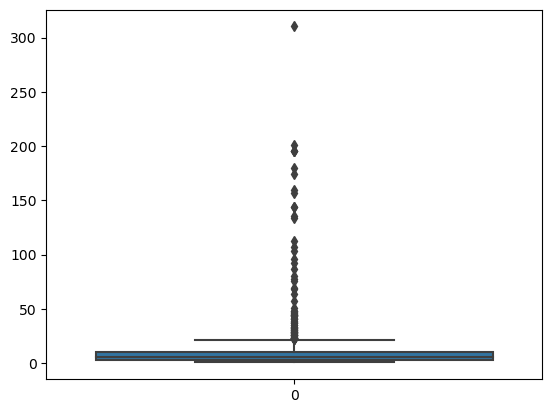

In [26]:
sns.boxplot(dataset['MILES'])